# 🛠️ Preparação dos Dados

## Importação dos dados

Aqui vamos importar os dados tratados no último challenge Telecom X, onde esses dados brutos foram tratados e preparados e exportados para essa análise.

In [36]:
# Importando biblioteca Pandas
import pandas as pd

In [37]:
# Importando dados salvos no repositório do github
# URL do CSV tratado
url = "https://raw.githubusercontent.com/Renan-S-Ribeiro/TelecomX_parte2/refs/heads/main/dados_tratados.csv"

# Lendo e adicionando em um dataframe
df = pd.read_csv(url)


# Visualizando as primeiras linhas
print(df.shape)   # tamanho do dataset
df.head()

(7043, 22)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


## Verificando e excluindo colunas Irrelevantes

In [39]:
#Colunas com valor único
colunas_unicas = [col for col in df.columns if df[col].nunique() <= 1]

#Correlação para numéricas
correlacao = df.corr(numeric_only=True).abs()
correlacao_alta = []
for col in correlacao.columns:
    correladas = correlacao.index[(correlacao[col] > 0.9) & (correlacao[col] < 1)]
    if len(correladas) > 0:
        correlacao_alta.append((col, list(correladas)))

#Colunas com alta cardinalidade (possível ID disfarçado)
colunas_alta_card = [col for col in df.columns if df[col].nunique() > 0.9 * len(df)]

print("Colunas com valor único:", colunas_unicas)
print("\nColunas altamente correlacionadas:", correlacao_alta)
print("\nColunas com alta cardinalidade:", colunas_alta_card)

#Excluir as colunas customerID, Contas_Diarias, Charges.Total
df = df.drop(columns=['customerID', 'Contas_Diarias', 'Charges.Total'], errors='ignore')

df.head()

Colunas com valor único: []

Colunas altamente correlacionadas: []

Colunas com alta cardinalidade: []


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9


## Encoding

In [40]:
# Converter variável alvo 'Churn' para binário
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [41]:
# Aplicar One-Hot Encoding nas colunas categóricas
df = pd.get_dummies(df, drop_first=True)

print(df.head())

   Churn  SeniorCitizen  tenure  Charges.Monthly  gender_Male  Partner_Yes  \
0      0              0       9             65.6        False         True   
1      0              0       9             59.9         True        False   
2      1              0       4             73.9         True        False   
3      1              1      13             98.0         True         True   
4      1              1       3             83.9        False         True   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0            True              True                           False   
1           False              True                           False   
2           False              True                           False   
3           False              True                           False   
4           False              True                           False   

   MultipleLines_Yes  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0              False  ...

## Verificação da Proporção de Evasão

In [42]:
# Contagem dos valores da coluna 'Churn'
contagem = df['Churn'].value_counts()

print("Contagem de clientes por classe:")
print(contagem)

# Proporção
proporcao = contagem / contagem.sum()

print("\nProporção de clientes por classe:")
print(proporcao)

# Proporção entre evadidos e ativos
prop_evadidos = proporcao.get(1, 0)
prop_ativos = proporcao.get(0, 0)

print(f"\nProporção de evadidos (Churn=1): {prop_evadidos:.4f}")
print(f"Proporção de ativos (Churn=0): {prop_ativos:.4f}")



Contagem de clientes por classe:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de clientes por classe:
Churn
0    0.73463
1    0.26537
Name: count, dtype: float64

Proporção de evadidos (Churn=1): 0.2654
Proporção de ativos (Churn=0): 0.7346


## Balanceamento de Classes

In [43]:
from imblearn.over_sampling import SMOTE

# Separar features (todas as colunas menos 'Churn') e target ('Churn')
X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Após SMOTE:", y_res.value_counts())


Após SMOTE: Churn
0    5174
1    5174
Name: count, dtype: int64


# 🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

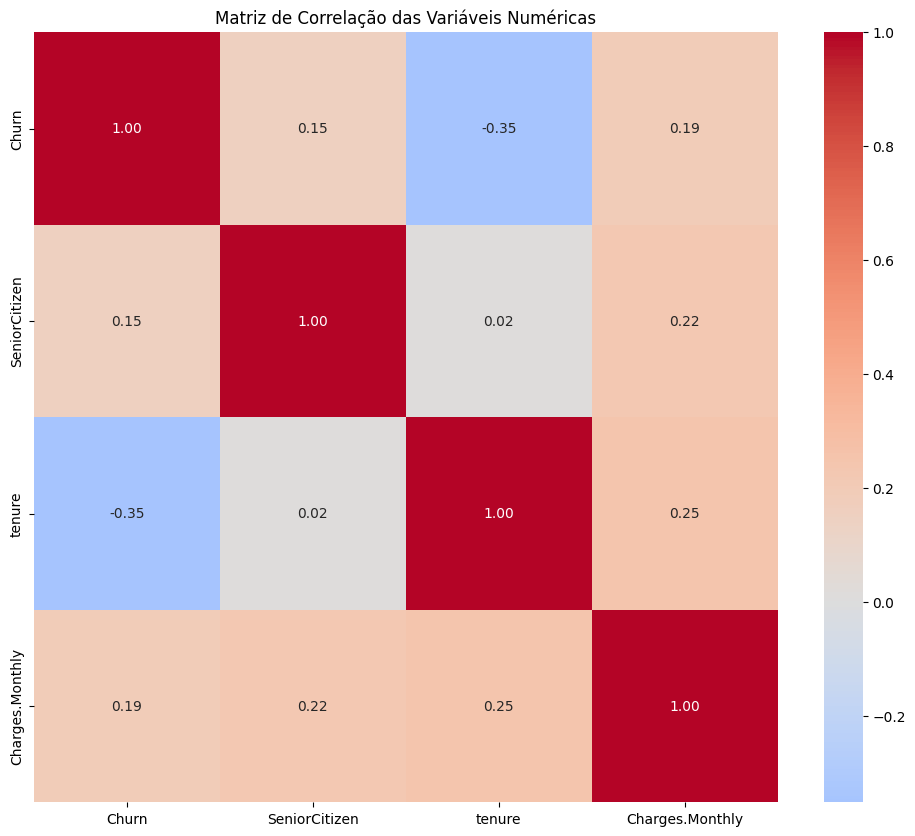

Correlação das variáveis numéricas com Churn:
Charges.Monthly    0.193356
SeniorCitizen      0.150889
tenure            -0.352229
Name: Churn, dtype: float64


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas as colunas numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
corr = df_num.corr()

# Visualizar a matriz de correlação com heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

# Mostrar correlação das variáveis com a variável alvo 'Churn', ordenado do maior para o menor
corr_churn = corr['Churn'].drop('Churn').sort_values(ascending=False)
print("Correlação das variáveis numéricas com Churn:")
print(corr_churn)


## Análises Direcionadas

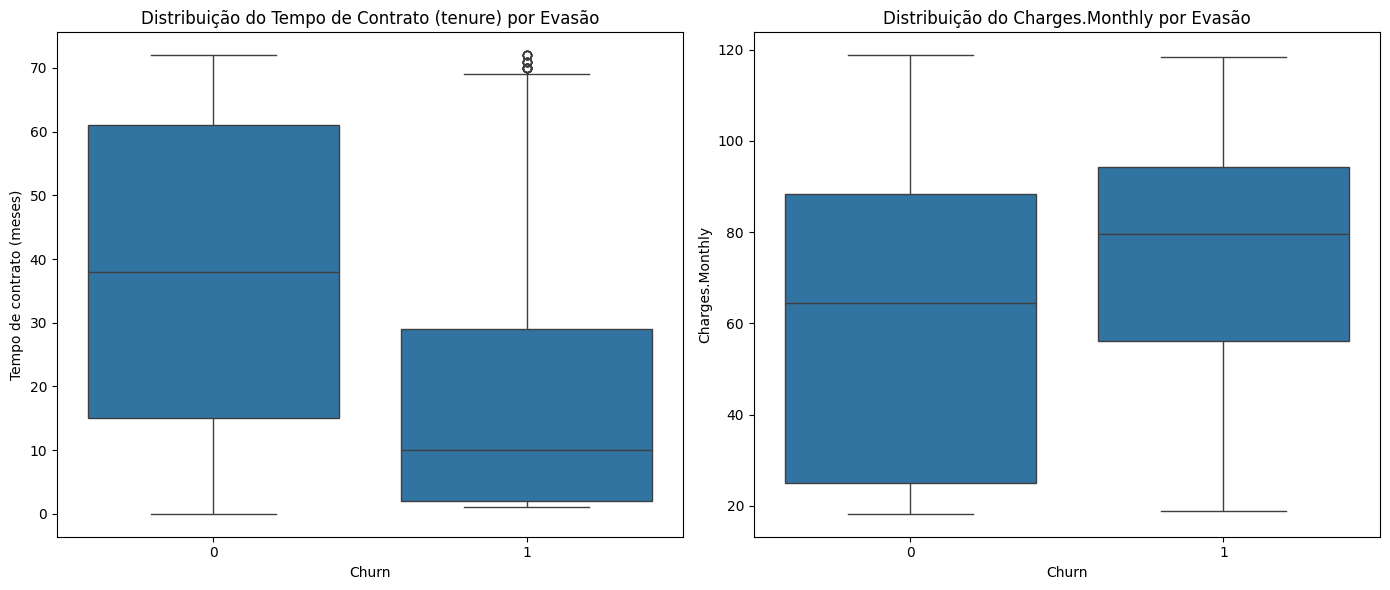

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Boxplot do tempo de contrato por evasão
sns.boxplot(x='Churn', y='tenure', data=df, ax=axs[0])
axs[0].set_title('Distribuição do Tempo de Contrato (tenure) por Evasão')
axs[0].set_xlabel('Churn')
axs[0].set_ylabel('Tempo de contrato (meses)')

# Boxplot do Charges.Monthly por evasão
sns.boxplot(x='Churn', y='Charges.Monthly', data=df, ax=axs[1])
axs[1].set_title('Distribuição do Charges.Monthly por Evasão')
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Charges.Monthly')

plt.tight_layout()
plt.show()


Possíveis tendencias:


*   Clientes que evadiram (Churn = 1) geralmente apresentam tempo de contrato menor — ou seja, eles ficaram menos tempo com a empresa antes de sair. Essa tendência confirma a correlação negativa moderada que você viu (-0.35) — quanto maior o tempo, menor a evasão.

*   Normalmente, clientes que evadiram têm uma distribuição mais ampla e mediana de valores mensais um pouco maior. Pode indicar que clientes com cobranças mensais mais altas têm maior propensão a cancelar, possivelmente por custo-benefício ou insatisfação.

# 🤖 Modelagem Preditiva

## Separação de Dados

In [47]:
from sklearn.model_selection import train_test_split

#X_res, y_res do SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")

# Balanceamento no treino
print("Distribuição no treino:")
print(y_train.value_counts())

# Balanceamento no teste
print("Distribuição no teste:")
print(y_test.value_counts())


Tamanho treino: 8278 amostras
Tamanho teste: 2070 amostras
Distribuição no treino:
Churn
1    4139
0    4139
Name: count, dtype: int64
Distribuição no teste:
Churn
0    1035
1    1035
Name: count, dtype: int64


## Criação de Modelos

### Modelo 1 - Regressão Logística (exige normalização)

Motivos da escolha:
*   Modelo linear e sensível à escala das variáveis.

*   Normalizar os dados evita que variáveis com escalas maiores dominem o treinamento.

*   Permite interpretar coeficientes e entender impacto das variáveis.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline que padroniza e depois treina o modelo
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

pipe_logreg.fit(X_train, y_train)
y_pred_logreg = pipe_logreg.predict(X_test)


### Modelo 2 - Random Forest (não exige normalização)

Motivos da escolha:
*   Modelo baseado em árvores, não sensível à escala dos dados.

*   Lida bem com variáveis numéricas e categóricas (dummies).

*   Robusto a outliers e interações não lineares.


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


## Avaliação dos Modelos

--- Avaliação do Modelo: Regressão Logística ---
Treino:
Acurácia: 0.8161 | Precisão: 0.8158 | Recall: 0.8166 | F1-score: 0.8162
Teste:
Acurácia: 0.8140 | Precisão: 0.8119 | Recall: 0.8174 | F1-score: 0.8146



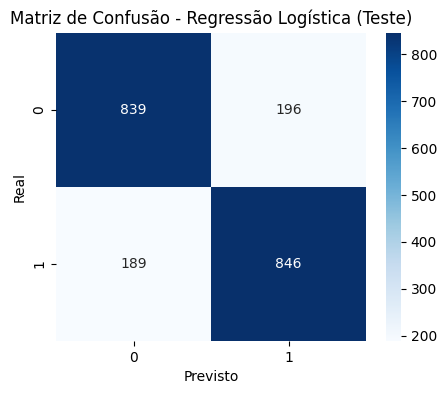

--- Avaliação do Modelo: Random Forest ---
Treino:
Acurácia: 0.9986 | Precisão: 0.9976 | Recall: 0.9995 | F1-score: 0.9986
Teste:
Acurácia: 0.8498 | Precisão: 0.8371 | Recall: 0.8686 | F1-score: 0.8525



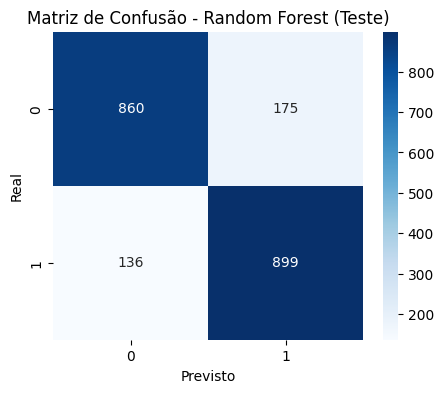

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste, nome_modelo):
    # Previsões treino e teste
    y_pred_train = modelo.predict(X_treino)
    y_pred_test = modelo.predict(X_teste)

    # Métricas treino
    acc_train = accuracy_score(y_treino, y_pred_train)
    prec_train = precision_score(y_treino, y_pred_train)
    rec_train = recall_score(y_treino, y_pred_train)
    f1_train = f1_score(y_treino, y_pred_train)

    # Métricas teste
    acc_test = accuracy_score(y_teste, y_pred_test)
    prec_test = precision_score(y_teste, y_pred_test)
    rec_test = recall_score(y_teste, y_pred_test)
    f1_test = f1_score(y_teste, y_pred_test)

    print(f"--- Avaliação do Modelo: {nome_modelo} ---")
    print("Treino:")
    print(f"Acurácia: {acc_train:.4f} | Precisão: {prec_train:.4f} | Recall: {rec_train:.4f} | F1-score: {f1_train:.4f}")
    print("Teste:")
    print(f"Acurácia: {acc_test:.4f} | Precisão: {prec_test:.4f} | Recall: {rec_test:.4f} | F1-score: {f1_test:.4f}\n")

    # Matriz de confusão no teste
    cm = confusion_matrix(y_teste, y_pred_test)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome_modelo} (Teste)')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    return {
        'nome': nome_modelo,
        'acc_train': acc_train, 'acc_test': acc_test,
        'prec_train': prec_train, 'prec_test': prec_test,
        'rec_train': rec_train, 'rec_test': rec_test,
        'f1_train': f1_train, 'f1_test': f1_test
    }


# Avaliar Regressão Logística (pipeline com scaler)
result_logreg = avaliar_modelo(pipe_logreg, X_train, y_train, X_test, y_test, "Regressão Logística")

# Avaliar Random Forest
result_rf = avaliar_modelo(rf, X_train, y_train, X_test, y_test, "Random Forest")


### Análise de comparação entre os modelos:


**Regressão Logistica:**
O desempenho é bastante estável entre treino e teste, com métricas muito próximas. Isso indica que o modelo está generalizando bem, sem sinais evidentes de overfitting ou underfitting.
Os valores na casa de ~81% para todas as métricas mostram uma performance consistente e razoável para o problema.

**Random Forest:**
O modelo apresenta acurácia e métricas quase perfeitas no treino, porém cai para ~85% no teste. Essa diferença muito grande entre treino e teste indica overfitting: o modelo aprendeu muito bem o conjunto de treino, mas não generalizou tão bem para dados novos.
Ainda assim, a performance no teste é melhor que a da Regressão Logística, especialmente em recall (86.86% vs 81.74%), o que significa que o Random Forest está conseguindo identificar melhor os clientes que vão evadir.

# 📋  Interpretação e Conclusões

## Análise de Importância das Variáveis

### Modelo 1 - Regressão Logística

In [51]:
import numpy as np
import pandas as pd

# Extrair os coeficientes do modelo (após o scaler)
coef = pipe_logreg.named_steps['logreg'].coef_[0]

# Obter os nomes das features (colunas)
features = X_train.columns

# Criar DataFrame com coeficientes e features
df_coef = pd.DataFrame({
    'Feature': features,
    'Coeficiente': coef
})

# Ordenar pelo valor absoluto do coeficiente (impacto)
df_coef['AbsCoef'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='AbsCoef', ascending=False).drop(columns='AbsCoef')

print(df_coef)


                                  Feature  Coeficiente
2                         Charges.Monthly    -8.964623
9             InternetService_Fiber optic     4.382910
6                        PhoneService_Yes     2.598206
22                    StreamingMovies_Yes     1.634874
20                        StreamingTV_Yes     1.625874
7          MultipleLines_No phone service     1.024887
8                       MultipleLines_Yes     1.002404
1                                  tenure    -0.989651
16                   DeviceProtection_Yes     0.767151
14                       OnlineBackup_Yes     0.722504
27         PaymentMethod_Electronic check     0.679652
12                     OnlineSecurity_Yes     0.562879
18                        TechSupport_Yes     0.539490
19        StreamingTV_No internet service    -0.438331
17        TechSupport_No internet service    -0.438331
21    StreamingMovies_No internet service    -0.438331
13       OnlineBackup_No internet service    -0.438331
10        

***Variáveis que reduzem a probabilidade de evasão:***


*   Charges.Monthly (-8.96): Quanto maior o valor mensal pago, menor a chance de evasãop. Pode ser que clientes que pagam mais tenham planos mais completos e fiquem mais fidelizados.

*   tenure (-0.99): Quanto maior o tempo de contrato, menor a chance de evasão. Faz sentido, clientes fiéis e antigos tendem a permanecer.



***Variáveis que aumentam a probabilidade de evasão:***


*   InternetService_Fiber optic (4.38): Clientes com internet fibra óptica têm maior probabilidade de evasão, pode indicar insatisfação ou competitividade nesse segmento.

*   PhoneService_Yes (2.60): Clientes que usam serviço telefônico apresentam maior evasão.

### Modelo 2 - Random Forest

Top 5 variáveis mais importantes no Random Forest:
                           Feature  Importancia
1                           tenure     0.225269
2                  Charges.Monthly     0.189980
27  PaymentMethod_Electronic check     0.092724
24               Contract_Two year     0.056282
9      InternetService_Fiber optic     0.043689


/tmp/ipython-input-3153797319.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Feature', data=df_importancia.head(5), palette='viridis')


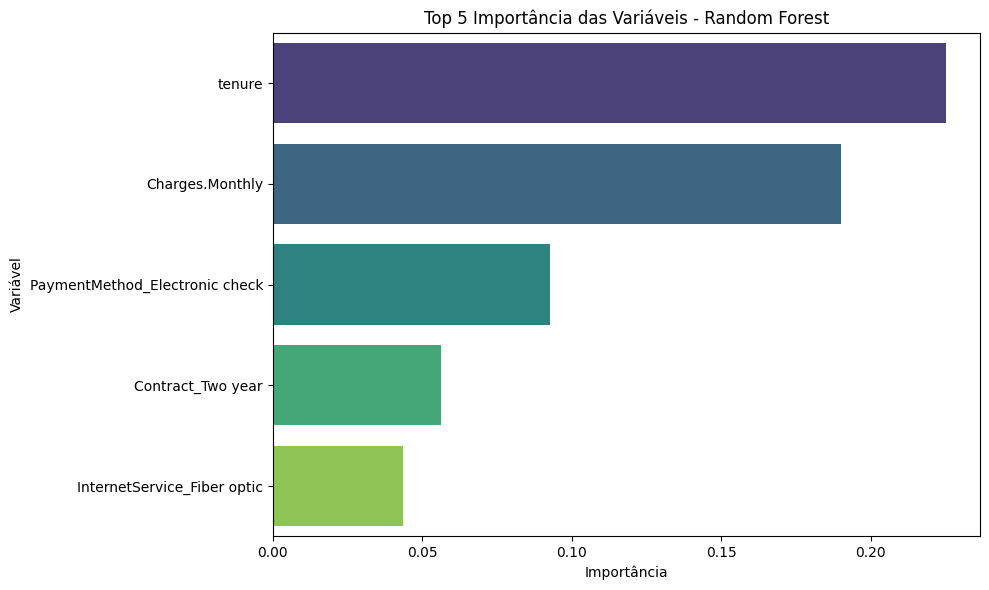

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extrair importâncias
importancias = rf.feature_importances_

# Criar DataFrame com nomes e importâncias
df_importancia = pd.DataFrame({
    'Feature': X_train.columns,
    'Importancia': importancias
})

# Ordenar do mais importante para o menos importante
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Mostrar as top 5 variáveis
print("Top 5 variáveis mais importantes no Random Forest:")
print(df_importancia.head(5))

# Plotar gráfico de barras das top 5
plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Feature', data=df_importancia.head(5), palette='viridis')
plt.title('Top 5 Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


***Interpretação das Variáveis Relevantes***



*   **tenure** (22.53%): É a variável mais importante, responsável por quase 1/4 da decisão do modelo. Clientes com maior tempo de contrato tendem a permanecer, reforçando o que vimos na Regressão Logística.

*   **Charges.Monthly** (18.99%): Também muito relevante, indica que o valor pago mensalmente impacta bastante a evasão. Pode estar relacionado à percepção de custo-benefício do cliente.

*    **PaymentMethod_Electronic check** (9.27%): Forma de pagamento por cheque eletrônico tem influência significativa, possivelmente indicando clientes com maior propensão a cancelar.

*   **Contract_Two year** (5.63%): Clientes com contrato de dois anos têm comportamento diferenciado, tendendo a menor evasão por fidelidade.

*   **InternetService_Fiber optic** (4.37%): Clientes com internet fibra óptica têm uma contribuição importante para as decisões, podendo estar associados a maior evasão.



## Conclusão

# Relatório de Análise de Evasão de Clientes — Telecom X

## 1. Objetivo

Analisar e prever a evasão de clientes (churn) utilizando técnicas de Machine Learning, identificando os principais fatores que influenciam o cancelamento dos serviços e propondo estratégias de retenção baseadas nesses insights.

---

## 2. Dados e Pré-processamento

- Base original tratada e balanceada com SMOTE para corrigir desbalanceamento entre classes (clientes que evadiram vs. que permaneceram).  
- Variáveis numéricas e categóricas transformadas (one-hot encoding).  
- Divisão treino/teste: 80%/20%, com estratificação para manter a proporção das classes.

---

## 3. Modelos Utilizados

### 3.1 Regressão Logística (com normalização)

- Modelo linear, sensível à escala das variáveis, interpretável.  
- Métricas no teste: Acurácia ~81.4%, Recall ~81.7%, F1-score ~81.5%.  
- Modelo estável, sem sinais de overfitting.

### 3.2 Random Forest (sem normalização)

- Modelo baseado em árvores, captura relações não lineares e interações.  
- Métricas no teste: Acurácia ~85.0%, Recall ~86.9%, F1-score ~85.3%.  
- Apresenta overfitting (acurácia de quase 100% no treino), mas desempenho superior no teste.

---

## 4. Principais Fatores que Influenciam a Evasão

### 4.1 Insights da Regressão Logística (coeficientes)

- **Tempo de contrato (tenure):** Clientes com maior tempo tendem a permanecer (coeficiente negativo forte).  
- **Charges.Monthly:** Clientes com valores mensais maiores têm menor chance de churn (coeficiente negativo significativo).  
- **InternetService_Fiber optic:** Aumenta a chance de churn, indicando possível insatisfação nesse serviço.  
- **Serviços adicionais (Streaming, DeviceProtection, OnlineBackup, etc.):** Associados a maior evasão, possivelmente devido a custos extras.  
- **Formas de pagamento (Electronic check):** Ligadas a maior churn, podem indicar menor fidelidade ou perfil de risco.

### 4.2 Insights do Random Forest (importância das variáveis)

- **Tenure (22.5%)** e **Charges.Monthly (19%)** são as variáveis mais importantes, confirmando sua relevância.  
- **Método de pagamento (Electronic check)**, **tipo de contrato (Two year, One year)** e **serviços contratados (Fiber optic, Multiple lines)** também impactam significativamente.  
- Variáveis demográficas como gênero e estado civil têm menor influência.

---

## 5. Análise e Recomendações

### 5.1 Estratégias baseadas no tempo de contrato

- Incentivar planos de fidelização mais longos (ex: descontos para contratos de 2 anos) para aumentar o tempo médio dos clientes.  
- Oferecer benefícios e programas de engajamento para clientes novos, que apresentam maior risco de evasão.

### 5.2 Gestão de preços e serviços adicionais

- Revisar a estrutura de preços para evitar que cobranças mensais elevadas gerem insatisfação, mesmo que dados apontem menor churn para valores altos (pode haver clientes de alta renda fiéis, mas atenção a segmentos sensíveis).  
- Avaliar o custo-benefício dos serviços adicionais (streaming, proteção, backup) e sua comunicação clara para o cliente, evitando cancelamentos motivados por custo.

### 5.3 Foco em serviços de internet e pagamento

- Monitorar a satisfação dos clientes com internet fibra óptica, pois essa tecnologia está associada a maior churn.  
- Melhorar políticas e facilidades para clientes que utilizam pagamento por cheque eletrônico, buscando alternativas que aumentem fidelidade.

### 5.4 Personalização e segmentação

- Utilizar os dados demográficos e de serviços para criar ofertas segmentadas e personalizadas, focando em perfis com maior risco de churn.

---

## 6. Considerações Finais

- O modelo Random Forest apresenta melhor desempenho preditivo, porém com risco de overfitting. Ajustes de hiperparâmetros são recomendados para melhorar a generalização.  
- A regressão logística oferece boa interpretabilidade, útil para entendimento e comunicação dos fatores de risco.  
- A combinação dos dois modelos pode ser usada para equilibrar performance e explicabilidade.

---

